In [1]:
import sys
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import iqr
from matplotlib import pyplot

# Local imports
sys.path.append('..')

from lib.autoencoder import Autoencoder
from lib.autoencoder_dataset import AutoencoderDataset

Remainder: 6
Num parts: 47.0


<AxesSubplot:>

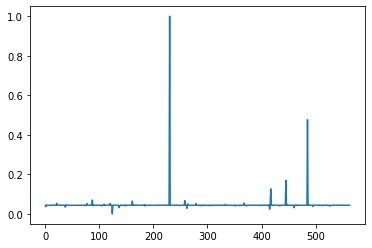

In [2]:
data_file = "../Datasets/exoTest.csv"

value_column = "FLUX.2500"

df = pd.read_csv(data_file)

window_size = 12
num_rows = len(df)

# Drop last remainder frames
remainder = num_rows % window_size
num_parts = (num_rows - remainder) / window_size

print("Remainder: {}".format(remainder))
print("Num parts: {}".format(num_parts))

# Dropping last n rows using drop
if remainder > 0:
    df.drop(df.tail(remainder).index, inplace = True)

df = (df[value_column]-df[value_column].min())/(df[value_column].max()-df[value_column].min())
df.plot()

<AxesSubplot:>

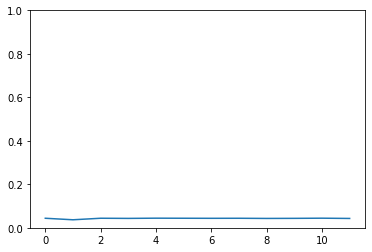

In [3]:
# Visualize the first window
ylim = (df.min(), df.max())
df_vector = df.head(window_size)
df_vector.plot(ylim=ylim)

In [4]:
stream_data = np.array(np.array_split(df, num_parts))

# for stream in stream_data:
#     temp_df = pd.DataFrame(stream, columns=['value'])
#     temp_df.plot(ylim=ylim)

In [5]:
# Autoencoder parameter for layers. First element is the size of the input vector. Succeeding values are hidden layers for the encoder
layers = [window_size, int(window_size - 3)]
print("layers: {}".format(layers))

# Autoencoder parameter for hidden activation
h_activation = 'relu'

# Autoencoder parameter for output activation
o_activation = 'sigmoid'

# Autoencoder parameter for learning rate
learning_rate = 0.0001

# Torch parameter for device
device = 'cpu'

# Training parameter for number of epochs
epochs = 100

# Training parameter for batch size
batch_size = 1

# Loss function
loss_fn = nn.MSELoss()

# DBSCAN parameter eps
eps = 0.1

# DBSCAN parameter minimum samples
min_samples = 5

layers: [12, 9]


In [6]:
model = Autoencoder(layers=layers, h_activation=h_activation, o_activation=o_activation, device=device)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Represent the training data as x
x = torch.tensor(stream_data).float().to(device)

# Load the dataset
train_ds = AutoencoderDataset(x=x)

# Create a DataLoader instance
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False, drop_last=False)

# The training process
for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    loop = tqdm(train_loader)
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Feed forward
        predictions = model(data)
        
        loss = loss_fn(predictions, targets)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())
        
print("Done training!")

Epoch: 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 580.72it/s, loss=0.194]


Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1366.81it/s, loss=0.192]


Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1510.46it/s, loss=0.191]


Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1449.15it/s, loss=0.189]


Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1482.33it/s, loss=0.188]


Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1200.47it/s, loss=0.186]


Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1316.45it/s, loss=0.184]


Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1430.24it/s, loss=0.183]


Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1290.94it/s, loss=0.181]


Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1313.58it/s, loss=0.179]


Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1290.81it/s, loss=0.177]


Epoch: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1361.29it/s, loss=0.175]


Epoch: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1435.36it/s, loss=0.173]


Epoch: 13


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1410.51it/s, loss=0.17]


Epoch: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1310.74it/s, loss=0.168]


Epoch: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1420.02it/s, loss=0.165]


Epoch: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1393.10it/s, loss=0.162]


Epoch: 17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1389.83it/s, loss=0.159]


Epoch: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1231.80it/s, loss=0.157]


Epoch: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1426.21it/s, loss=0.154]


Epoch: 20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1123.96it/s, loss=0.151]


Epoch: 21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1482.94it/s, loss=0.147]


Epoch: 22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1330.58it/s, loss=0.144]


Epoch: 23


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1517.17it/s, loss=0.141]


Epoch: 24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1215.85it/s, loss=0.138]


Epoch: 25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1492.74it/s, loss=0.135]


Epoch: 26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1502.90it/s, loss=0.132]


Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1155.20it/s, loss=0.129]


Epoch: 28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1493.15it/s, loss=0.126]


Epoch: 29


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1617.00it/s, loss=0.122]


Epoch: 30


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1175.60it/s, loss=0.119]


Epoch: 31


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1483.94it/s, loss=0.116]


Epoch: 32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1395.00it/s, loss=0.113]


Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1491.21it/s, loss=0.11]


Epoch: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1504.30it/s, loss=0.107]


Epoch: 35


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1543.03it/s, loss=0.104]


Epoch: 36


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1543.64it/s, loss=0.101]


Epoch: 37


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1577.60it/s, loss=0.098]


Epoch: 38


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1226.51it/s, loss=0.0952]


Epoch: 39


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1466.18it/s, loss=0.0923]


Epoch: 40


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1520.17it/s, loss=0.0895]


Epoch: 41


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1448.59it/s, loss=0.0868]


Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1579.56it/s, loss=0.0841]


Epoch: 43


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1343.25it/s, loss=0.0815]


Epoch: 44


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1274.75it/s, loss=0.0789]


Epoch: 45


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1185.32it/s, loss=0.0763]


Epoch: 46


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1100.25it/s, loss=0.0739]


Epoch: 47


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1424.05it/s, loss=0.0714]


Epoch: 48


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1455.36it/s, loss=0.0691]


Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1399.89it/s, loss=0.0668]


Epoch: 50


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1468.28it/s, loss=0.0645]


Epoch: 51


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1439.12it/s, loss=0.0623]


Epoch: 52


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1514.41it/s, loss=0.0602]


Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1470.61it/s, loss=0.0581]


Epoch: 54


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1413.51it/s, loss=0.0561]


Epoch: 55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1476.07it/s, loss=0.0542]


Epoch: 56


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1265.33it/s, loss=0.0523]


Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 1548.22it/s, loss=0.0504]


Epoch: 58


  0%|                                                                                                                                                                          | 0/47 [00:00<?, ?it/s, loss=0.0487]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
z = model.encode(x).detach().cpu().numpy().astype(np.float32)

columns = []

for i in range(len(z[0])):
    columns.append("x{}".format(i))

df_z = pd.DataFrame(z, columns=columns)

# Normalize the data with MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(df_z.values)

# Reassign to df_z
df_z = pd.DataFrame(z_scaled, columns=columns)

# Fetch the errors per data
predictions = model(x)
targets = x

x_loss = nn.MSELoss(reduction='none')(predictions, targets).sum(axis=1).detach().cpu().numpy().astype(np.float32)
df_z['error'] = x_loss

df_z

,x0,x1,x2,x3,x4,x5,x6,x7,x8,error
0,0.038243,0.000000,0.016149,0.0,0.0,0.022165,0.0,0.0,0.0,0.122705
1,0.065963,0.045890,0.041640,0.0,0.0,0.045254,0.0,0.0,0.0,0.112917
2,0.050663,0.022429,0.024487,0.0,0.0,0.035938,0.0,0.0,0.0,0.118173
3,0.045060,0.005305,0.018746,0.0,0.0,0.028036,0.0,0.0,0.0,0.121581
4,0.048808,0.018400,0.021978,0.0,0.0,0.033507,0.0,0.0,0.0,0.119061
5,0.053447,0.021754,0.024783,0.0,0.0,0.036651,0.0,0.0,0.0,0.117944
6,0.057153,0.020900,0.034784,0.0,0.0,0.034647,0.0,0.0,0.0,0.116244
7,0.094140,0.090766,0.034617,0.0,0.0,0.099951,0.0,0.0,0.0,0.109147
8,0.043024,0.016320,0.021074,0.0,0.0,0.030650,0.0,0.0,0.0,0.119778
9,0.055547,0.031745,0.025472,0.0,0.0,0.041799,0.0,0.0,0.0,0.116700


In [8]:
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(df_z.values)

unique_labels = np.unique(clustering.labels_)

print("Cluster labels: {}".format(unique_labels))

df_z_with_cluster_labels = df_z.copy()
df_z_with_cluster_labels['cluster_label'] = clustering.labels_

for cluster_label in unique_labels:
    count = len(df_z_with_cluster_labels[df_z_with_cluster_labels['cluster_label'] == cluster_label])
    print("Count for Cluster {}: {}".format(cluster_label, count))
    
df_z_with_cluster_labels

Cluster labels: [-1  0]
Count for Cluster -1: 4
Count for Cluster 0: 43


,x0,x1,x2,x3,x4,x5,x6,x7,x8,error,cluster_label
0,0.038243,0.000000,0.016149,0.0,0.0,0.022165,0.0,0.0,0.0,0.122705,0
1,0.065963,0.045890,0.041640,0.0,0.0,0.045254,0.0,0.0,0.0,0.112917,0
2,0.050663,0.022429,0.024487,0.0,0.0,0.035938,0.0,0.0,0.0,0.118173,0
3,0.045060,0.005305,0.018746,0.0,0.0,0.028036,0.0,0.0,0.0,0.121581,0
4,0.048808,0.018400,0.021978,0.0,0.0,0.033507,0.0,0.0,0.0,0.119061,0
5,0.053447,0.021754,0.024783,0.0,0.0,0.036651,0.0,0.0,0.0,0.117944,0
6,0.057153,0.020900,0.034784,0.0,0.0,0.034647,0.0,0.0,0.0,0.116244,0
7,0.094140,0.090766,0.034617,0.0,0.0,0.099951,0.0,0.0,0.0,0.109147,0
8,0.043024,0.016320,0.021074,0.0,0.0,0.030650,0.0,0.0,0.0,0.119778,0
9,0.055547,0.031745,0.025472,0.0,0.0,0.041799,0.0,0.0,0.0,0.116700,0


In [9]:
df_normal = pd.DataFrame(stream_data)

df_normal = df_normal[df_z_with_cluster_labels['cluster_label'] != -1]

df_normal

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.043878,0.036907,0.043946,0.043253,0.044252,0.043928,0.043629,0.043838,0.043071,0.043456,0.044183,0.043018
1,0.043972,0.045412,0.044082,0.043926,0.044088,0.043965,0.043978,0.043933,0.044023,0.053966,0.044038,0.044267
2,0.044072,0.044991,0.043948,0.042822,0.044231,0.044008,0.043344,0.043945,0.043873,0.044129,0.044503,0.044026
3,0.043772,0.034441,0.043876,0.045846,0.044106,0.043870,0.043949,0.044060,0.043928,0.043924,0.043934,0.043858
4,0.043924,0.043970,0.043820,0.043259,0.043950,0.043561,0.043690,0.043950,0.044029,0.043868,0.043986,0.043619
5,0.043985,0.043710,0.043957,0.043544,0.043768,0.043845,0.044161,0.044583,0.044144,0.043756,0.043449,0.044745
6,0.043423,0.043949,0.044018,0.041181,0.043864,0.052176,0.043912,0.043850,0.043971,0.043862,0.045332,0.043939
7,0.045156,0.044132,0.043946,0.070355,0.043913,0.041310,0.044266,0.043752,0.043983,0.043945,0.043917,0.043990
8,0.043923,0.043939,0.043790,0.043907,0.044151,0.044057,0.043929,0.043888,0.040519,0.043932,0.044168,0.043830
9,0.043933,0.049406,0.042799,0.043909,0.043861,0.043870,0.043722,0.043983,0.044094,0.043824,0.043968,0.043946


In [10]:
# Represent the training data as x
x = torch.tensor(df_normal.values).float().to(device)

# Load the dataset
train_ds = AutoencoderDataset(x=x)

# Create a DataLoader instance
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False, drop_last=False)

# The training process
for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    loop = tqdm(train_loader)
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Feed forward
        predictions = model(data)
        
        loss = loss_fn(predictions, targets)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())
        
print("Done training!")

Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1213.52it/s, loss=0.00952]


Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1147.67it/s, loss=0.00916]


Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1547.63it/s, loss=0.00881]


Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1355.53it/s, loss=0.00848]


Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1373.22it/s, loss=0.00816]


Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1520.91it/s, loss=0.00784]


Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1505.66it/s, loss=0.00754]


Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1485.06it/s, loss=0.00725]


Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1381.04it/s, loss=0.00698]


Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1428.79it/s, loss=0.00671]


Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1420.87it/s, loss=0.00645]


Epoch: 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1422.03it/s, loss=0.0062]


Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1498.54it/s, loss=0.00596]


Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1506.27it/s, loss=0.00573]


Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1520.92it/s, loss=0.00551]


Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1514.89it/s, loss=0.00529]


Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1067.33it/s, loss=0.00509]


Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1126.79it/s, loss=0.00489]


Epoch: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1524.71it/s, loss=0.0047]


Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1481.14it/s, loss=0.00451]


Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1410.79it/s, loss=0.00434]


Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1426.90it/s, loss=0.00417]


Epoch: 22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1418.47it/s, loss=0.004]


Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1488.00it/s, loss=0.00384]


Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1441.49it/s, loss=0.00369]


Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1569.15it/s, loss=0.00355]


Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1558.80it/s, loss=0.0034]


Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1540.57it/s, loss=0.00327]


Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1564.62it/s, loss=0.00314]


Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1514.93it/s, loss=0.00301]


Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1485.42it/s, loss=0.00289]


Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1564.36it/s, loss=0.00277]


Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1398.62it/s, loss=0.00266]


Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1546.12it/s, loss=0.00255]


Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1576.48it/s, loss=0.00245]


Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1475.70it/s, loss=0.00235]


Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1488.94it/s, loss=0.00225]


Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1405.23it/s, loss=0.00216]


Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1302.40it/s, loss=0.00207]


Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1440.50it/s, loss=0.00199]


Epoch: 40


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1484.42it/s, loss=0.0019]


Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1510.51it/s, loss=0.00183]


Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1561.52it/s, loss=0.00175]


Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1133.39it/s, loss=0.00168]


Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1274.68it/s, loss=0.00161]


Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1534.30it/s, loss=0.00154]


Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1567.88it/s, loss=0.00147]


Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1529.73it/s, loss=0.00141]


Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1397.08it/s, loss=0.00135]


Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1398.58it/s, loss=0.00129]


Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1456.38it/s, loss=0.00124]


Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1523.09it/s, loss=0.00118]


Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1529.60it/s, loss=0.00113]


Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1404.08it/s, loss=0.00108]


Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1473.49it/s, loss=0.00104]


Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1489.07it/s, loss=0.00099]


Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1320.34it/s, loss=0.000946]


Epoch: 57


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1371.04it/s, loss=0.000904]


Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1138.13it/s, loss=0.000864]


Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1404.91it/s, loss=0.000826]


Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1567.51it/s, loss=0.000789]


Epoch: 61


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1573.19it/s, loss=0.000753]


Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1451.89it/s, loss=0.000719]


Epoch: 63


  0%|                                                                                                                                                                        | 0/43 [00:00<?, ?it/s, loss=0.000676]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



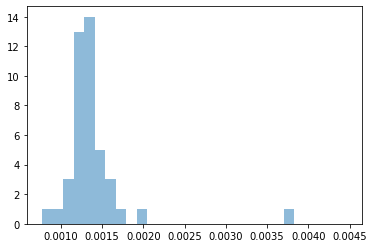

Bin Width: 9.955539188719693e-05
Num Bins: 30
Max Loss: 0.003814849304035306
Min Loss: 0.0007742710877209902
Min Bin: 0.0007742710877209902
Max Bin: 0.004589120391756296
Optimal Threshold: 0.0037625697092153135


In [11]:
"""
Utility Functions
"""
# Head tail break function
def htb(data):
    outp = []
    
    def htb_inner(data):
        data_length = float(len(data))
        data_mean = sum(data) / data_length
        
        head = [_ for _ in data if _ > data_mean]
        outp.append(data_mean)
        
        while len(head) > 1 and len(head) / data_length < 0.40:
            return htb_inner(head)
        
    htb_inner(data)
    
    return outp

# Determine a breakpoint
def fetch_threshold(bins, counts, break_point):
    index = 0
    latest_min = 999999
    threshold = -1
    
    for i in range(len(counts)):
        diff = abs(counts[i] - break_point)
        
        if diff <= latest_min:
            latest_min = diff
            index = i
            threshold = ((bins[i + 1] - bins[i]) / 2) + bins[i]
            
    return threshold

predictions = model(x)
targets = x

x_loss = nn.MSELoss(reduction='none')(predictions, targets).sum(axis=1).detach().cpu().numpy().astype(np.float32)

max_loss = np.max(x_loss)
min_loss = np.min(x_loss)

# Compute the optimal bin width using Freedman Diaconis rule
bin_width = 2 * (iqr(x_loss) / (len(x_loss) ** (1./3)))

if(bin_width == 0):
    bin_width = 0.01
num_bins = int((max_loss - min_loss) / bin_width)

# Create the histogram
min_bin = np.min(x_loss)
max_bin = np.max(x_loss) + min_bin

step = (max_bin - min_bin) / num_bins

bins = np.arange(min_bin, max_bin, step)

hist, bins = np.histogram(x_loss, bins=bins)

pyplot.hist(x_loss, bins, alpha=0.5)
pyplot.show()

print("Bin Width: {}".format(bin_width))
print("Num Bins: {}".format(num_bins))
print("Max Loss: {}".format(max_loss))
print("Min Loss: {}".format(min_loss))
print("Min Bin: {}".format(min_bin))
print("Max Bin: {}".format(max_bin))



# Determine breaks
breaks = htb(hist)

possible_thresholds = []

for b in breaks:
    t = fetch_threshold(bins, hist, b)
    possible_thresholds.append(t)

optimal_threshold = max(possible_thresholds)

print("Optimal Threshold: {}".format(optimal_threshold))

In [12]:
# Convert test data to tensor
x = torch.tensor(stream_data).float().to(device)

predictions = model(x)
targets = x

# Get reconstruction error
x_loss = nn.MSELoss(reduction='none')(predictions, targets).sum(axis=1).detach().cpu().numpy().astype(np.float32)

# If reconstruction error is >= than the optimal threshold, we consider it an anomaly
bool_arr = x_loss >= optimal_threshold

# Convert anomaly labels to -1 if True and 1 if False
anomaly_predictions = np.array([-1 if elem else 1 for elem in bool_arr])

# Build dataframe for test data and attach predictions
df_test_x_with_labels = pd.DataFrame(stream_data)
df_test_x_with_labels['y'] = anomaly_predictions

df_test_x_with_labels

,0,1,2,3,4,5,6,7,8,9,10,11,y
0,0.043878,0.036907,0.043946,0.043253,0.044252,0.043928,0.043629,0.043838,0.043071,0.043456,0.044183,0.043018,1
1,0.043972,0.045412,0.044082,0.043926,0.044088,0.043965,0.043978,0.043933,0.044023,0.053966,0.044038,0.044267,1
2,0.044072,0.044991,0.043948,0.042822,0.044231,0.044008,0.043344,0.043945,0.043873,0.044129,0.044503,0.044026,1
3,0.043772,0.034441,0.043876,0.045846,0.044106,0.043870,0.043949,0.044060,0.043928,0.043924,0.043934,0.043858,1
4,0.043924,0.043970,0.043820,0.043259,0.043950,0.043561,0.043690,0.043950,0.044029,0.043868,0.043986,0.043619,1
5,0.043985,0.043710,0.043957,0.043544,0.043768,0.043845,0.044161,0.044583,0.044144,0.043756,0.043449,0.044745,1
6,0.043423,0.043949,0.044018,0.041181,0.043864,0.052176,0.043912,0.043850,0.043971,0.043862,0.045332,0.043939,1
7,0.045156,0.044132,0.043946,0.070355,0.043913,0.041310,0.044266,0.043752,0.043983,0.043945,0.043917,0.043990,1
8,0.043923,0.043939,0.043790,0.043907,0.044151,0.044057,0.043929,0.043888,0.040519,0.043932,0.044168,0.043830,1
9,0.043933,0.049406,0.042799,0.043909,0.043861,0.043870,0.043722,0.043983,0.044094,0.043824,0.043968,0.043946,1


In [13]:
stream_data_with_labels = []
for index, row in df_test_x_with_labels.iterrows():
    label = row['y']
    for point in row[:-1].values:
        stream_data_with_labels.append([point, label])

stream_data_with_labels = pd.DataFrame(stream_data_with_labels, columns=['value', 'y'])


<AxesSubplot:>

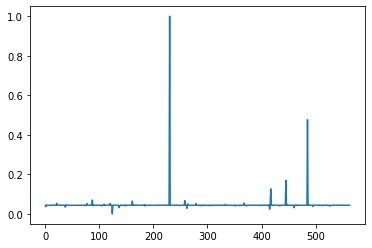

In [14]:
df.plot()

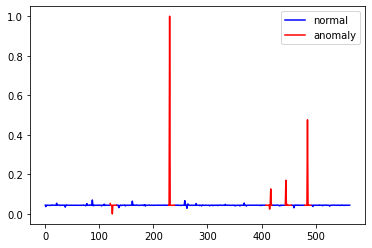

In [15]:

plt.plot(np.where(stream_data_with_labels["y"]==1, stream_data_with_labels["value"], None), color="blue", label="normal")
plt.plot(np.where(stream_data_with_labels["y"]==-1, stream_data_with_labels["value"], None), color="red", label="anomaly")
plt.legend()